In [ ]:
import os
os.getcwd()

'c:\\Users\\00824732\\Desktop\\geek6\\personal\\New folder\\pandas done\\Done'

In [2]:
os.chdir(r'C:\Users\00824732\Desktop')

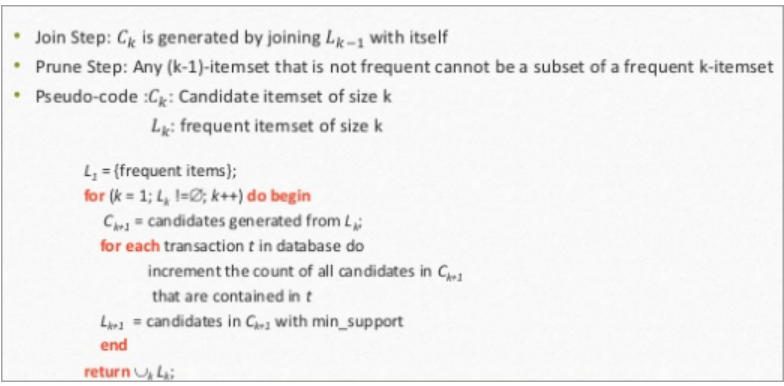

In [5]:
from PIL import Image
# open method used to open different extension image file
im = Image.open(r"C:/Users/00824732/Desktop/Aprioir_algo.PNG") 
# This method will show image in any image viewer 
im

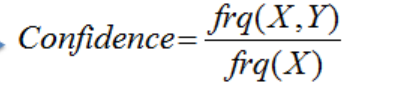

In [8]:
## Confidence indicates the number of times the if-then statements are found true


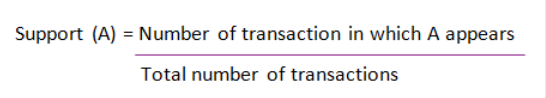

In [9]:
## Support refers to items' frequency of occurrence

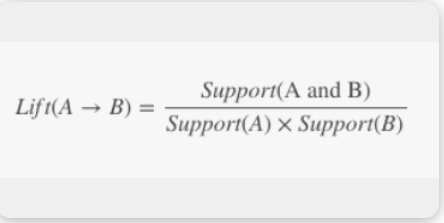

In [10]:
## Lift



In [3]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules

In [4]:
data=pd.read_excel('file:///C:/Users/00824732/Desktop/online_retail_II.xlsx')

In [5]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [ ]:
## Exploring items based on different countries

In [6]:
data.Country.unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

In [ ]:
## Split the data according to the regions

In [7]:
basket_France=(data[data['Country']=='France'].groupby(['Invoice','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice'))

In [8]:
basket_Portugal=(data[data['Country']=='Portugal'].groupby(['Invoice','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice'))

In [9]:
basket_France=(data[data['Country']=='USA'].groupby(['Invoice','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice'))

In [ ]:
## One Hot Encoding

In [10]:
def hot_encode(x):
    if x>0:
        return 0
    else:
        return 1

In [11]:
basket_france=basket_France.applymap(hot_encode)
basket_USA=basket_France.applymap(hot_encode)
basket_Portugal=basket_France.applymap(hot_encode)

## Bulding the models

In [12]:
freq_itemset=apriori(basket_france,min_support=0.05,use_colnames=True)

KeyboardInterrupt: 

In [ ]:
rules = association_rules(freq_itemset, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

## Second Example

In [13]:
data=pd.read_excel('file:///C:/Users/00824732/Desktop/online_retail_II.xlsx')

In [14]:
data.shape

(525461, 8)

In [16]:
transaction=[]
for i in range(0,data.shape[0]):
    for j in range(0,data.shape[1]):
        transaction.append(data.values[i,j])

transaction=np.array(transaction)
## Transform to dataframe
df=pd.DataFrame(transaction,columns=["items"])
df["index_count"]=1
## Delete NAN items in the dataset
indexNames=df[df['items']=="nan"].index
df.drop(indexNames,inplce=True)


In [ ]:
## Making a new appropriation Pandas DataFrame

In [ ]:
df_table=df.groupby("items").sum().sort_values("incident_count",ascending=False).reset_index()

In [ ]:
df_table.head(10).style.background_gradient(cmap='Green')

## Using apriori

In [ ]:
from mlextend.frequent_patterns import apriori,association_rules

In [ ]:
frequen_items=apriori(dataset,min_support=0.1,use_colname=True)
frequen_items['length']=frequen_items['itemset'].apply(lambda x:len(x))
frequen_items

In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]

In [ ]:
# printing the frequntly items with length 3
frequent_itemsets[ (frequent_itemsets['length'] == 3) ].head(3)

In [ ]:
# Mining association rules
# We know that the association rules are simply the if-else statements. The IF component of an association rule is known as the antecedent. The THEN component is known as the consequent. The antecedent and the consequent are disjoint; they have no items in common.

In [ ]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

In [ ]:
# Sort values based on confidence
rules.sort_values("confidence",ascending=False)

In [ ]:
# This table shows the relationship between different items and the likelihood of a customer buying those items together. For example, according to the table above, the customers who purchased eggs and ground beef are expected to buy mineral water with a likelihood of 50% (confidence).

## 3rd Example

In [11]:
!pip3 install apyori

You should consider upgrading via the 'C:\Users\00824732\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/Market_Basket_Optimisation.csv', header = None)

In [ ]:
transacts = []
# populating a list of transactions
for i in range(0, 7501): 
  transacts.append([str(Data.values[i,j]) for j in range(0, 20)])

In [ ]:
## Training apriori model

In [ ]:
from apyori import apriori
rule = apriori(transactions = transacts, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

In [ ]:
output = list(rule) # returns a non-tabular output
# putting output into a pandas dataframe
def inspect(output):
    lhs         = [tuple(result[2][0][0])[0] for result in output]
    rhs         = [tuple(result[2][0][1])[0] for result in output]
    support    = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift       = [result[2][0][3] for result in output]
    return list(zip(lhs, rhs, support, confidence, lift))
output_DataFrame = pd.DataFrame(inspect(results), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])

In [ ]:
output_DataFrame.nlargest(n = 10, columns = 'Lift')

In [ ]:
# ##Advantages
# 1.Easy to understand algorithm
# 2.Join and Prune steps are easy to implement on large itemsets in large databases
# # Disadvantages
# 1.It requires high computation if the itemsets are very large and the minimum support is kept very low.
# 2.The entire database needs to be scanned.